In [31]:
#Raymond M. Chan's WeatherPy Project
#Date: June 21, 2018
import json
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt
import time
import csv
from config import api_key
from citipy import citipy
from pprint import pprint


In [20]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

In [21]:
#Create list of unique cities
cities=[]
lat=[]
lng=[]
CC=[]

#Counter for Log
count=0

while len(cities)!=500:
    
#store lat and lng
    xcor=random.uniform(-65,65)
    ycor=random.uniform(-160,160)
    
    city = citipy.nearest_city(xcor,ycor)
    check = 1
    
#check if city is in cities list
    for x in cities:
        if city.city_name==x:
            check=0
            
#check if city exists on openweathermap
    if check==1:
        query_url = url + "appid=" + api_key + "&q=" + city.city_name
        weather_response = requests.get(query_url)
        time.sleep(1)
       

        if weather_response.status_code!=404:
            cities.append(city.city_name)

#Print Log of Cities being added into cities list
                
            country_code = city.country_code
            name = city.city_name
            count=count+1
            print(f"City number: {count} \n {name} \n Country Code: '{country_code}'")
                
#Store Lat and Long
            lat.append(xcor)
            lng.append(ycor)
            CC.append(city.country_code)
                
        

# print(cities)
            
        

City number: 1 
 gharghoda 
 Country Code: 'in'
City number: 2 
 akdepe 
 Country Code: 'tm'
City number: 3 
 cape town 
 Country Code: 'za'
City number: 4 
 georgetown 
 Country Code: 'sh'
City number: 5 
 punta arenas 
 Country Code: 'cl'
City number: 6 
 cabo san lucas 
 Country Code: 'mx'
City number: 7 
 belonia 
 Country Code: 'in'
City number: 8 
 jamestown 
 Country Code: 'sh'
City number: 9 
 xunchang 
 Country Code: 'cn'
City number: 10 
 athabasca 
 Country Code: 'ca'
City number: 11 
 ampanihy 
 Country Code: 'mg'
City number: 12 
 east london 
 Country Code: 'za'
City number: 13 
 sydney 
 Country Code: 'au'
City number: 14 
 rikitea 
 Country Code: 'pf'
City number: 15 
 souillac 
 Country Code: 'mu'
City number: 16 
 itarema 
 Country Code: 'br'
City number: 17 
 torrijos 
 Country Code: 'es'
City number: 18 
 butaritari 
 Country Code: 'ki'
City number: 19 
 chimbote 
 Country Code: 'pe'
City number: 20 
 durban 
 Country Code: 'za'
City number: 21 
 meadville 
 Country

City number: 169 
 katobu 
 Country Code: 'id'
City number: 170 
 prince rupert 
 Country Code: 'ca'
City number: 171 
 pangoa 
 Country Code: 'pe'
City number: 172 
 tasiilaq 
 Country Code: 'gl'
City number: 173 
 kavieng 
 Country Code: 'pg'
City number: 174 
 valenca 
 Country Code: 'br'
City number: 175 
 la ronge 
 Country Code: 'ca'
City number: 176 
 nantucket 
 Country Code: 'us'
City number: 177 
 isla mujeres 
 Country Code: 'mx'
City number: 178 
 kerchevskiy 
 Country Code: 'ru'
City number: 179 
 vredendal 
 Country Code: 'za'
City number: 180 
 yellowknife 
 Country Code: 'ca'
City number: 181 
 bonavista 
 Country Code: 'ca'
City number: 182 
 bay roberts 
 Country Code: 'ca'
City number: 183 
 atar 
 Country Code: 'mr'
City number: 184 
 horodnya 
 Country Code: 'ua'
City number: 185 
 japura 
 Country Code: 'br'
City number: 186 
 petauke 
 Country Code: 'zm'
City number: 187 
 marinette 
 Country Code: 'us'
City number: 188 
 praia da vitoria 
 Country Code: 'pt'
Cit

City number: 336 
 mount isa 
 Country Code: 'au'
City number: 337 
 cayenne 
 Country Code: 'gf'
City number: 338 
 guerrero negro 
 Country Code: 'mx'
City number: 339 
 black river 
 Country Code: 'jm'
City number: 340 
 talcahuano 
 Country Code: 'cl'
City number: 341 
 sioux lookout 
 Country Code: 'ca'
City number: 342 
 daura 
 Country Code: 'ng'
City number: 343 
 tinqueux 
 Country Code: 'fr'
City number: 344 
 rongcheng 
 Country Code: 'cn'
City number: 345 
 ancud 
 Country Code: 'cl'
City number: 346 
 linxia 
 Country Code: 'cn'
City number: 347 
 vryburg 
 Country Code: 'za'
City number: 348 
 urubicha 
 Country Code: 'bo'
City number: 349 
 teguise 
 Country Code: 'es'
City number: 350 
 atbasar 
 Country Code: 'kz'
City number: 351 
 sindang 
 Country Code: 'id'
City number: 352 
 panama city 
 Country Code: 'us'
City number: 353 
 ambulu 
 Country Code: 'id'
City number: 354 
 grindavik 
 Country Code: 'is'
City number: 355 
 hohhot 
 Country Code: 'cn'
City number: 35

In [22]:
temp=[]
hum=[]
cloud=[]
wind=[]
for city in cities:

# Build query URL
    try:
        query_url = url + "appid=" + api_key + "&q=" + city

# Get weather data
        weather_response = requests.get(query_url)
        time.sleep(1)
        weather_json = weather_response.json()

# print(weather_json["main"]["temp"])

# Store data for each list needed

        temp.append(weather_json["main"]["temp"])
        hum.append(weather_json["main"]["humidity"])
        cloud.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        
    except KeyError:
        print(f"{city} is not on openweathermap.com")
    
#Validate
# pprint(weather_json)
# print(wind)

In [35]:
weatherPY_df=pd.DataFrame(
    {'City': cities,
     'Cloudiness': cloud,
     'Country Code': CC,
     'Humidity': hum,
     'Temperature (F)': temp,
     'Lat': lat,
     'Lng': lng,
     'Wind Speed': wind
    })

#Save to csv
weatherPY_df.to_csv("weatherPyoutput", encoding='utf-8', index=False)

weatherPY_df.head()

,City,Cloudiness,Country Code,Humidity,Lat,Lng,Temperature (F),Wind Speed
0,gharghoda,76,in,93,22.352094,83.358344,297.194,1.41
1,akdepe,0,tm,33,41.041171,59.130787,302.640,5.10
2,cape town,75,za,77,-42.421319,6.696272,288.150,7.20
3,georgetown,75,sh,83,-4.716539,-17.570270,300.150,3.10
4,punta arenas,20,cl,80,-60.235763,-105.556519,274.150,10.30


Analysis: Looks as though the temperature gets higher the closer the latitude is to 0, showing that the cities closer to the equator are more likely to be of warmer climates.

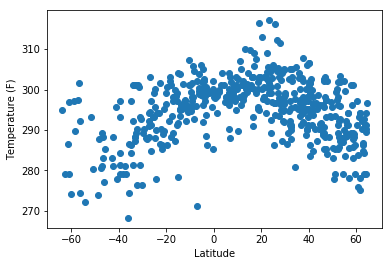

In [37]:
#Temp vs Lat
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.scatter(lat,temp)


plt.savefig('TemperatureScatterOutput.png')
#plt.show()
# plt.savefig?

Analysis: At first it appears that most cities are randomly scattered, however if you would observe the top middle, there appears to be more cities with high humidities closer to the equator as well, agreeing with the temperature plot as well.

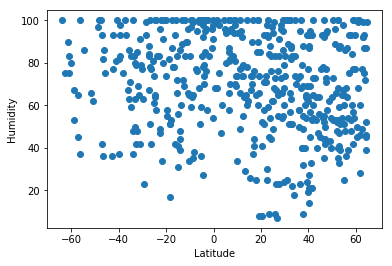

In [39]:
#Hum Vs Lat
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.scatter(lat,hum)
#plt.show()
plt.savefig('HumidityScatterOutput.png')

Analysis for the Cloudiness Plot: It looks almost as if the plot forms evenly distrubted horizontal lines.  This doesn't appear to be too related with latitude itself but shows that cloudiness is very consistent across latitudes.

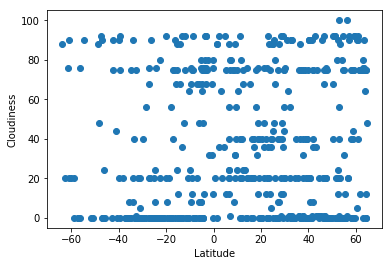

In [40]:
#Cloudiness vs Lat
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.scatter(lat,cloud)
#plt.show()
plt.savefig('CloudinessScatterOutput.png')

Analysis: It appears the wind speed is more condensed on the bottom have of the plot, sort of showing that the wind speed in generally lower along this latitude.

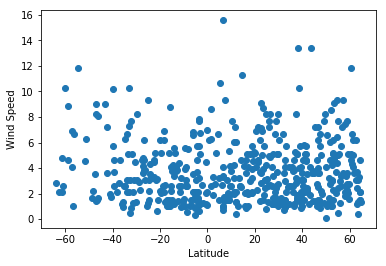

In [38]:
#Wind Speed vs Lat
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.scatter(lat,wind)
#plt.show()
plt.savefig('WindSpeedScatterOutput.png')